#Experiment 3: Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.
## Student Name: Reuel Rolland Gomes
## Roll No. 23 Batch: 1 Date: 28-01-2026

## LR using OLS






In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

In [3]:
x = np.array([1, 2, 3]).reshape((-1, 1))
y = np.array([2, 3, 5])

In [4]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [5]:
weight = model.coef_[0]
bias = model.intercept_
print(f"Weight: {weight}, Bias: {bias}")

Weight: 1.4999999999999993, Bias: 0.3333333333333348


In [6]:
y_pred = model.predict(x)
print("Predictions for training data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y = {ypi}")

Predictions for training data
x = 1, Actual y = 2, Predicted y = 1.8333333333333341
x = 2, Actual y = 3, Predicted y = 3.3333333333333335
x = 3, Actual y = 5, Predicted y = 4.833333333333333


In [7]:
x = np.array([10, 20, 30, 50]).reshape((-1, 1))
y = np.array([12, 21, 29, 48])

model = LinearRegression()
model.fit(x, y)

weight = model.coef_[0]
bias = model.intercept_
print(f"Weight: {weight}, Bias: {bias}")

y_pred = model.predict(x)
print("\nPredictions for training data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y = {ypi}")

Weight: 0.8971428571428574, Bias: 2.828571428571422

Predictions for training data
x = 10, Actual y = 12, Predicted y = 11.799999999999995
x = 20, Actual y = 21, Predicted y = 20.77142857142857
x = 30, Actual y = 29, Predicted y = 29.742857142857144
x = 50, Actual y = 48, Predicted y = 47.68571428571429


## LR using MLE

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
x = np.array([1, 2, 3])
y = np.array([2, 3, 5])

In [10]:
def negative_log_likelihood(params):
    weight, bias = params
    sigma_squared = 1.0
    y_pred = weight*x + bias
    nll = 0.5*np.sum(((y-y_pred)**2)) / sigma_squared
    return nll

In [11]:
initial_guess = [0, 0]

In [12]:
result = minimize(negative_log_likelihood, initial_guess)
w_mle, b_mle = result.x
print(f"Slope is: {w_mle}, intercept: {b_mle}")

Slope is: 1.500000003897125, intercept: 0.3333333918730798


In [13]:
y_pred = w_mle*x + b_mle
print("Predictions for training data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y = {ypi}")

Predictions for training data
x = 1, Actual y = 2, Predicted y = 1.833333395770205
x = 2, Actual y = 3, Predicted y = 3.33333339966733
x = 3, Actual y = 5, Predicted y = 4.833333403564454


In [14]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.05555555555556004
R^2 Score: 0.9642857142857114


In [15]:
x = np.array([10, 20, 30, 50])
y = np.array([12, 21, 29, 48])

def negative_log_likelihood(params):
    weight, bias = params
    sigma_squared = 1.0
    y_pred = weight*x + bias
    nll = 0.5*np.sum(((y-y_pred)**2)) / sigma_squared
    return nll

initial_guess = [0, 0]

result = minimize(negative_log_likelihood, initial_guess)
w_mle, b_mle = result.x
print(f"Slope is: {w_mle}, intercept: {b_mle}")

y_pred = w_mle*x + b_mle
print("\nPredictions for training data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y = {ypi}")

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"\nMean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Slope is: 0.8971428246616441, intercept: 2.828572315886469

Predictions for training data
x = 10, Actual y = 12, Predicted y = 11.800000562502909
x = 20, Actual y = 21, Predicted y = 20.77142880911935
x = 30, Actual y = 29, Predicted y = 29.74285705573579
x = 50, Actual y = 48, Predicted y = 47.68571354896867

Mean Squared Error: 0.18571428571451654
R^2 Score: 0.998946301925024


### LR Using Gradient Descent (GD) Optimization ALgorithm

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
x = np.array([1, 2, 3])
y = np.array([2, 3, 5])

In [18]:
weight, bias = 0, 0
alpha = 0.001
n_iter = 10000
n = len(x)

In [19]:
for i in range(n_iter):
    y_pred = weight * x.flatten() + bias
    dw = (-2/n) * np.sum(x.flatten() * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    weight -= alpha * dw
    bias -= alpha * db

print(f"Slope is: {weight}, intercept: {bias}")

Slope is: 1.4891282998341364, intercept: 0.35804726319993174


### LR Using Gradient Descent (GD) Optimization Algorithm with Single Parameter

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
x = np.array([1, 2, 3])
y = np.array([2, 3, 5])
n = len(x)

In [22]:
def loss(w1):
    w0 = np.mean(y) - w1 * np.mean(x)
    y_pred = w1 * x + w0
    return np.sum((y-y_pred)**2)

In [23]:
def gradient(w1):
    w0 = np.mean(y) - w1 * np.mean(x)
    y_pred = w1 * x + w0
    grad = (-2/n) * np.sum((y - y_pred) * (x - np.mean(x)))
    return grad

In [24]:
lr = 0.1
w1 = 4
iter = 15
w1_values = []
loss_values = []

for i in range(iter):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 -= lr * grad

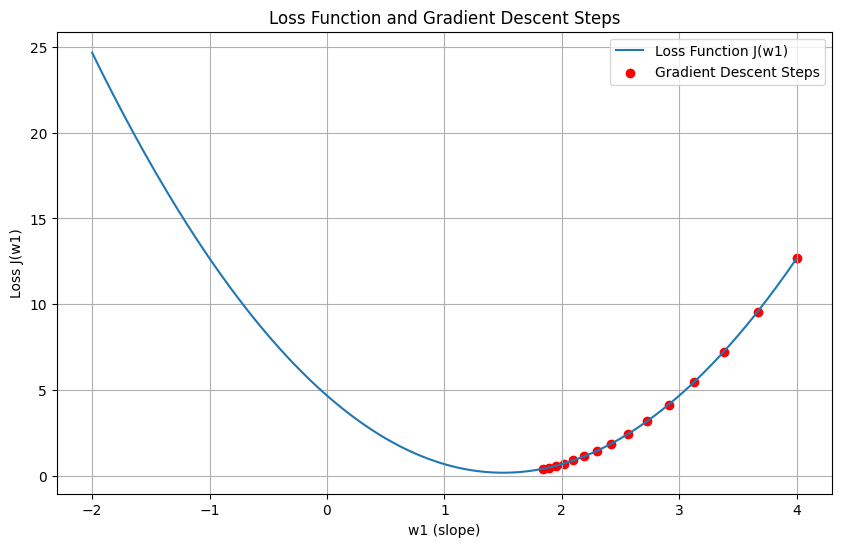

In [25]:
w_space = np.linspace(-2, 4, 200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize=(10, 6))
plt.plot(w_space, loss_space, label='Loss Function J(w1)')
plt.scatter(w1_values, loss_values, color='red', label='Gradient Descent Steps')
plt.xlabel('w1 (slope)')
plt.ylabel('Loss J(w1)')
plt.title('Loss Function and Gradient Descent Steps')
plt.legend()
plt.grid(True)
plt.show()